<a href="https://colab.research.google.com/github/Joseluismed/Tarea2_Solitones_JLMG/blob/main/Tarea2_solitones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Vórtices globales

## Para n=0



Código numérico con n=0

Valor f(0) ajustado: 1.0


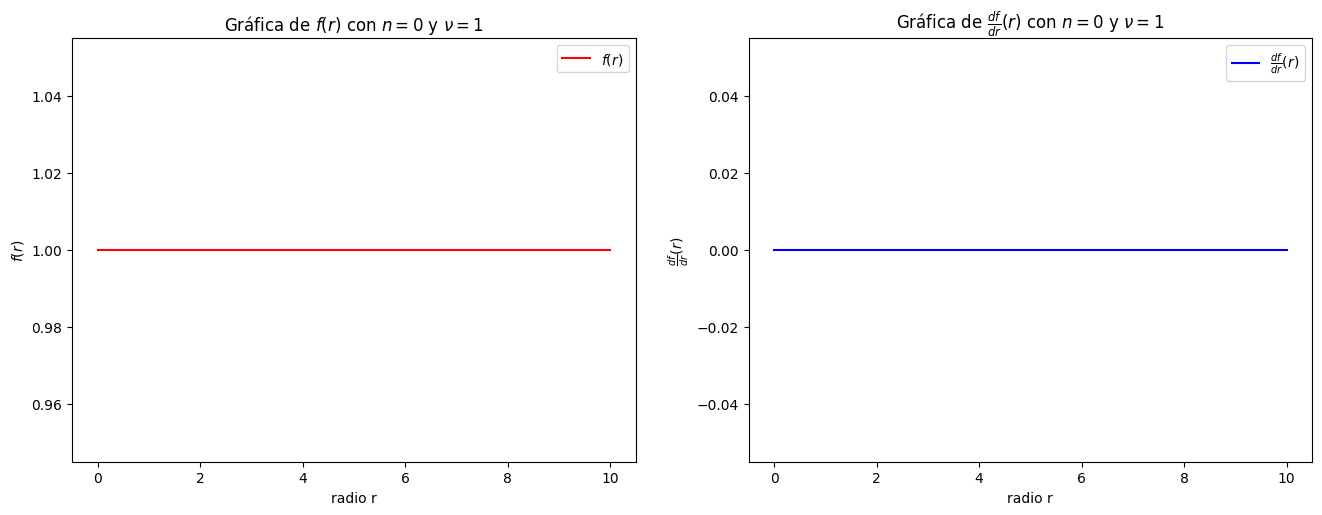

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#SOLUCIÓN CON n=0
# Parámetros de ecuacion diferencial
nu = 1
l=1   #lambda
# Definir la ecuación diferencial a resolver sistema(variable independiente, vector estado[])
def sistema(r, y):
    """
    phi: posición
    y: vector de estado [phi, v]
    """
    f, v = y  # funcion y su derivada
    if r == 0:
        dfdr = 0
        dvdr = 0
    else:
        dfdr = v  # Derivada de f con respecto a r
        dvdr = -v/r + l*(f**2 - nu**2)*f  # Derivada de la velocidad con respecto a r
    return np.array([dfdr, dvdr])

# Definir el método de Runge-Kutta de cuarto orden
def RK4Met(f, y0, a, b, npt):
    h = (b - a) / (npt - 1)
    x = np.linspace(a, b, npt)
    sol = np.zeros((npt, len(y0)))
    sol[0, :] = y0

    for i in range(1, npt):
        k1 = h * f(x[i-1], sol[i-1, :])
        k2 = h * f(x[i-1] + h/2, sol[i-1, :] + k1/2)
        k3 = h * f(x[i-1] + h/2, sol[i-1, :] + k2/2)
        k4 = h * f(x[i-1] + h, sol[i-1, :] + k3)
        sol[i, :] = sol[i-1, :] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

    return x, sol



# Intervalo y número de puntos
a = 0  # Inicio del intervalo
b = 10  # Fin del intervalo
npt = 500  # Número de puntos

#método de shooting para encontrar valor inicial de función f(r=0)
def shootingn0(f_amin, f_amax, nu, a, b, tol=1e-14):
    while True:
      h=(f_amin+f_amax)/2
      y0 = [h, 0]
      r, sol = RK4Met(sistema, y0, a, b, npt)
      if abs(sol[-1, 0] - nu) < tol:
        return h
      if sol[-1, 0] < nu:
        f_amin = h
      else:
        f_amax = h
      if abs(f_amax - f_amin) < tol:
        return h



#Intervalo de shooting
f_amin = nu-10
f_amax = nu+10

# Solución final con el valor ajustado de la función en f(r=0)
h = shootingn0(f_amin, f_amax, nu, a, b)
y0 = [h, 0]
print('Valor f(0) ajustado:', h)

r, sol = RK4Met(sistema, y0, a, b, npt)
f = sol[:, 0]
v = sol[:, 1]

# Graficar los resultados
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))

ax[0].plot(r, f, c='red', label=r'$f(r)$')
ax[1].plot(r, v, c='blue', label=r'$\frac{df}{dr}(r)$')
ax[0].set_xlabel('radio r')
ax[1].set_xlabel('radio r')
ax[0].set_ylabel(r'$f(r)$')
ax[1].set_ylabel(r'$\frac{df}{dr}(r)$')
ax[0].set_title(r'Gráfica de $f(r)$ con $n=0$ y $\nu=1$')
ax[1].set_title(r'Gráfica de $\frac{df}{dr}(r)$ con $n=0$ y $\nu=1$')
ax[0].legend()
ax[1].legend()
plt.show()


Gráfica de densidad de energía con n=0

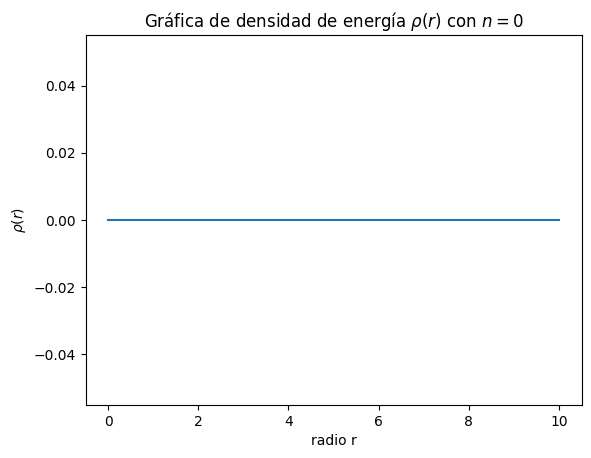

In [ ]:
#gráfica de densidad de energía con n=0
rho=v**2+(l/2)*(f**2-nu**2)**2
plt.plot(r,rho)
plt.xlabel('radio r')
plt.ylabel(r'$\rho(r)$')
plt.title(r'Gráfica de densidad de energía $\rho(r)$ con $n=0$')
plt.show()

Cálculo numérico de la energía en base a la densidad de energía con n=0

In [ ]:
E=np.trapz(rho,r)
print('La energía con la configuración n=0 es E=',E)

La energía con la configuración n=0 es E= 0.0


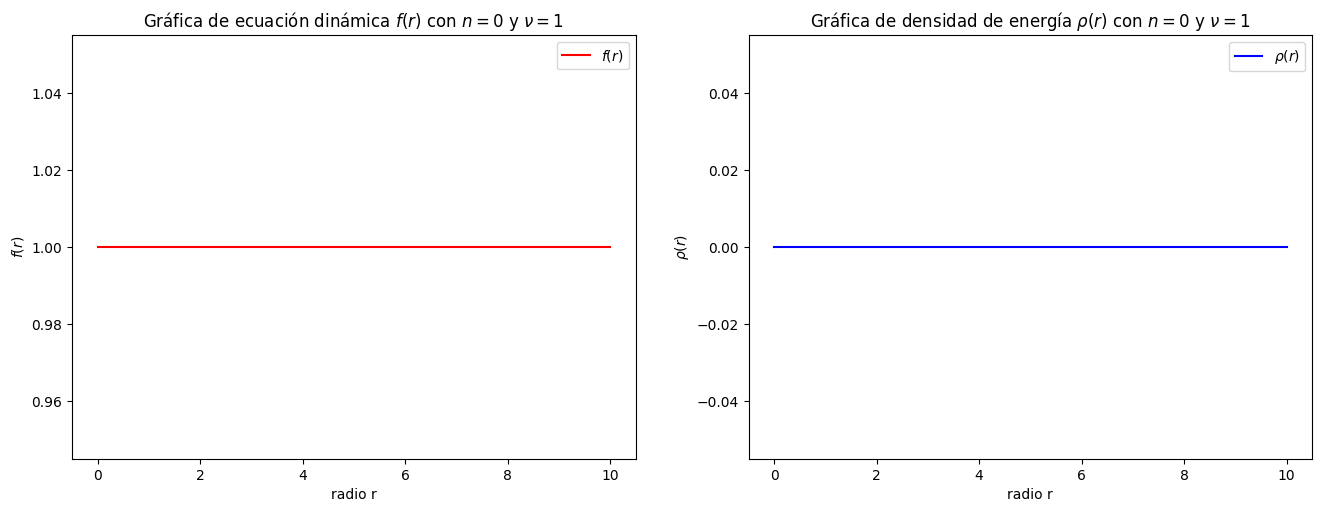

In [ ]:
# Graficar los resultados
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))

ax[0].plot(r, f, c='red', label=r'$f(r)$')
ax[1].plot(r, rho, c='blue', label=r'$\rho(r)$')
ax[0].set_xlabel('radio r')
ax[1].set_xlabel('radio r')
ax[0].set_ylabel(r'$f(r)$')
ax[1].set_ylabel(r'$\rho(r)$')
ax[0].set_title(r'Gráfica de ecuación dinámica $f(r)$ con $n=0$ y $\nu=1$')
ax[1].set_title(r'Gráfica de densidad de energía $\rho(r)$ con $n=0$ y $\nu=1$')
ax[0].legend()
ax[1].legend()
plt.show()

## Para n=1

Código numérico con n=1

<ipython-input-13-0e1be3dc2fd2>:20: RuntimeWarning: overflow encountered in scalar multiply
  dvdr = -v/r + f/r**2 + l*(f**2 - nu**2)*f  # Derivada de la velocidad con respecto a r
<ipython-input-13-0e1be3dc2fd2>:20: RuntimeWarning: overflow encountered in scalar power
  dvdr = -v/r + f/r**2 + l*(f**2 - nu**2)*f  # Derivada de la velocidad con respecto a r
<ipython-input-13-0e1be3dc2fd2>:20: RuntimeWarning: invalid value encountered in scalar add
  dvdr = -v/r + f/r**2 + l*(f**2 - nu**2)*f  # Derivada de la velocidad con respecto a r


Derivada inicial ajustada: 0.5831843281890681


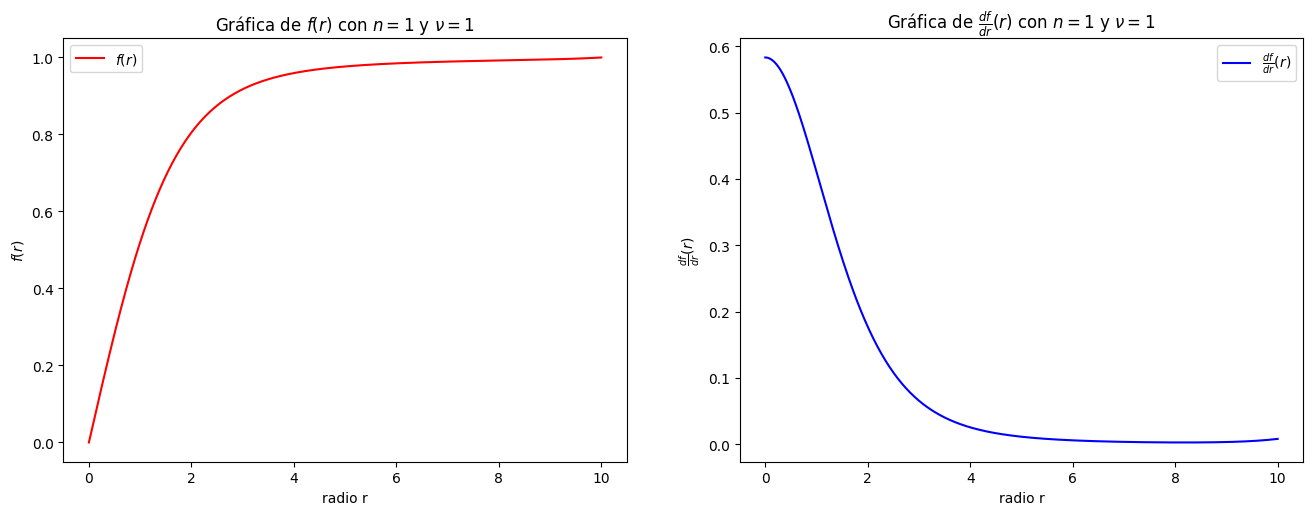

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#SOLUCIÓN CON n=1
# Parámetros de ecuacion diferencial
nu = 1
l=1
# Definir la ecuación diferencial a resolver sistema(variable independiente, vector estado[])
def sistema(r, y):
    """
    phi: posición
    y: vector de estado [phi, v]
    """
    f, v = y  # funcion y su derivada
    if r == 0:
        dfdr = v
        dvdr = 0
    else:
        dfdr = v  # Derivada de phi con respecto a r
        dvdr = -v/r + f/r**2 + l*(f**2 - nu**2)*f  # Derivada de la velocidad con respecto a r
    return np.array([dfdr, dvdr])

# Definir el método de Runge-Kutta de cuarto orden
def RK4Met(f, y0, a, b, npt):
    h = (b - a) / (npt - 1)
    x = np.linspace(a, b, npt)
    sol = np.zeros((npt, len(y0)))
    sol[0, :] = y0

    for i in range(1, npt):
        k1 = h * f(x[i-1], sol[i-1, :])
        k2 = h * f(x[i-1] + h/2, sol[i-1, :] + k1/2)
        k3 = h * f(x[i-1] + h/2, sol[i-1, :] + k2/2)
        k4 = h * f(x[i-1] + h, sol[i-1, :] + k3)
        sol[i, :] = sol[i-1, :] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

    return x, sol

# Condiciones en la frontera
f_a = 0  # Valor en la frontera en r = a
f_b = nu  # Valor en la frontera en r = b

# Intervalo y número de puntos
a = 0  # Inicio del intervalo
b = 10  # Fin del intervalo
npt = 500  # Número de puntos

# Método de shooting utilizando bisección para encontrar la mejor derivada inicial
def shootingn1(vmin, vmax, nu, a, b, tol=1e-14):
    while True:
        v = (vmin + vmax) / 2
        y0 = [f_a, v]
        r, sol = RK4Met(sistema, y0, a, b, npt)

        # Comprobar el valor de la solución en la frontera
        if abs(sol[-1, 0] - f_b) < tol:  # Condición de tolerancia
            return v

        # Ajustar los límites de bisección
        if sol[-1, 0] < f_b:
            vmin = v
        else:
            vmax = v

        # Si la diferencia entre vmax y vmin es menor que la tolerancia
        if abs(vmax - vmin) < tol:
            return v

# Aplicación del método de shooting
vmin = 0
vmax = 10
dfdr = 0

# Solución final con el valor ajustado de la derivada inicial
v = shootingn1(vmin, vmax, nu, a, b)
y0 = [f_a, v]
print('Derivada inicial ajustada:', v)

r, sol = RK4Met(sistema, y0, a, b, npt)
f = sol[:, 0]
v = sol[:, 1]

# Graficar los resultados
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))

ax[0].plot(r, f, c='red', label=r'$f(r)$')
ax[1].plot(r, v, c='blue', label=r'$\frac{df}{dr}(r)$')
ax[0].set_xlabel('radio r')
ax[1].set_xlabel('radio r')
ax[0].set_ylabel(r'$f(r)$')
ax[1].set_ylabel(r'$\frac{df}{dr}(r)$')
ax[0].set_title(r'Gráfica de $f(r)$ con $n=1$ y $\nu=1$')
ax[1].set_title(r'Gráfica de $\frac{df}{dr}(r)$ con $n=1$ y $\nu=1$')
ax[0].legend()
ax[1].legend()
plt.show()


Gráfica de densidad de energía con n=1

<ipython-input-23-45713e05a588>:1: RuntimeWarning: invalid value encountered in divide
  rho=v**2+f**2/r**2+(l/2)*(f**2-nu**2)**2


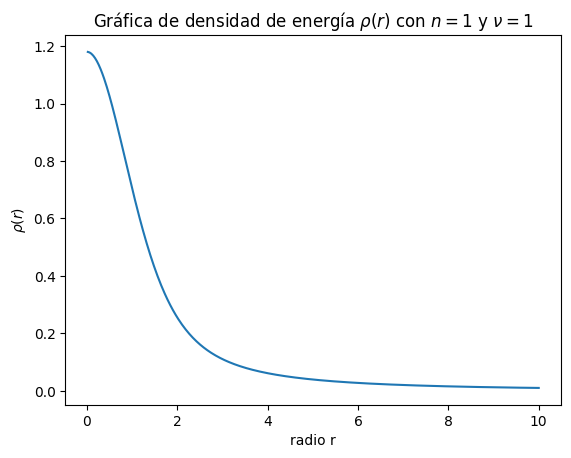

In [ ]:
rho=v**2+f**2/r**2+(l/2)*(f**2-nu**2)**2
plt.plot(r,rho)
plt.xlabel('radio r')
plt.ylabel(r'$\rho(r)$')
plt.title(r'Gráfica de densidad de energía $\rho(r)$ con $n=1$ y $\nu=1$')
plt.show()

Cálculo numérico de la energía en base a la densidad de energía con n=1

In [ ]:
E=np.trapz(rho,r)
if np.isnan(E):
  print('La energía con la configuración n=1 es E=inf')
else:
  print('La energía con la configuración n=1 es E=',E)

La energía con la configuración n=1 es E=inf


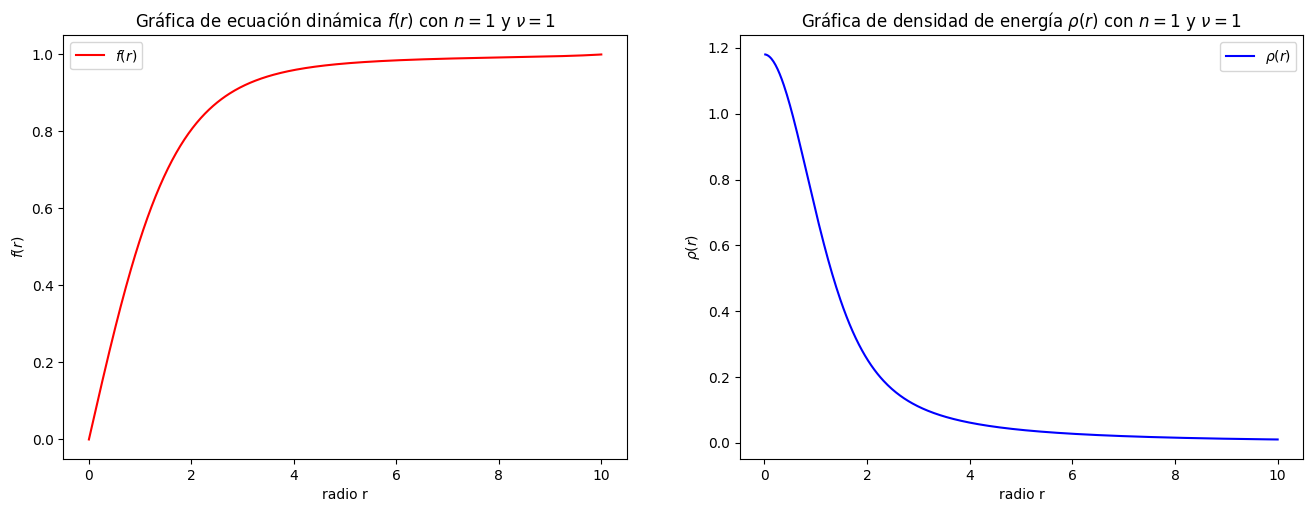

In [ ]:
# Graficar los resultados
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))

ax[0].plot(r, f, c='red', label=r'$f(r)$')
ax[1].plot(r, rho, c='blue', label=r'$\rho(r)$')
ax[0].set_xlabel('radio r')
ax[1].set_xlabel('radio r')
ax[0].set_ylabel(r'$f(r)$')
ax[1].set_ylabel(r'$\rho(r)$')
ax[0].set_title(r'Gráfica de ecuación dinámica $f(r)$ con $n=1$ y $\nu=1$')
ax[1].set_title(r'Gráfica de densidad de energía $\rho(r)$ con $n=1$ y $\nu=1$')
ax[0].legend()
ax[1].legend()
plt.show()

## Para n=2

Código numérico con n=2

<ipython-input-1-b115f272f327>:20: RuntimeWarning: overflow encountered in scalar multiply
  ddsdr = -5*ds/r + l*(r**4*s**2 - nu**2)*s  # 2da Derivada de sigma con respecto a r
<ipython-input-1-b115f272f327>:20: RuntimeWarning: overflow encountered in scalar power
  ddsdr = -5*ds/r + l*(r**4*s**2 - nu**2)*s  # 2da Derivada de sigma con respecto a r
<ipython-input-1-b115f272f327>:20: RuntimeWarning: invalid value encountered in scalar add
  ddsdr = -5*ds/r + l*(r**4*s**2 - nu**2)*s  # 2da Derivada de sigma con respecto a r


Valor s(0) ajustado: 0.15310012761843517


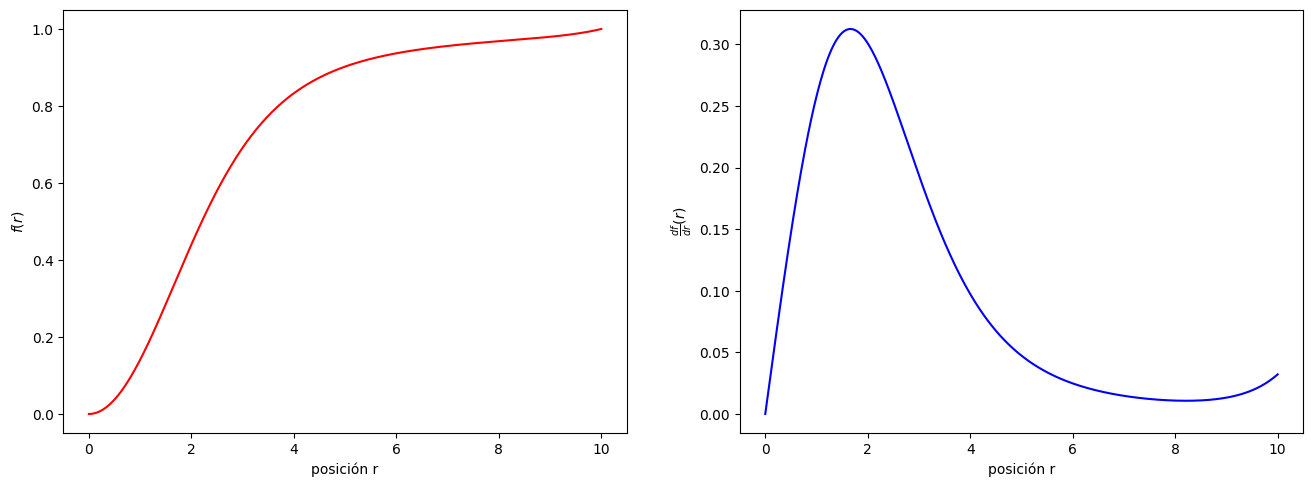

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#SOLUCIÓN CON n=2
# Parámetros de ecuacion diferencial
nu = 1
l=1
# Definir la ecuación diferencial a resolver sistema(variable independiente, vector estado[])
def sistema(r, y):
    """
    phi: posición
    y: vector de estado [phi, v]
    """
    s, ds = y  # funcion y su derivada
    if r == 0:
        dsdr = 0
        ddsdr = 0
    else:
        dsdr = ds  # Derivada de sigma con respecto a r
        ddsdr = -5*ds/r + l*(r**4*s**2 - nu**2)*s  # 2da Derivada de sigma con respecto a r
    return np.array([dsdr, ddsdr])

# Definir el método de Runge-Kutta de cuarto orden
def RK4Met(f, y0, a, b, npt):
    h = (b - a) / (npt - 1)
    x = np.linspace(a, b, npt)
    sol = np.zeros((npt, len(y0)))
    sol[0, :] = y0

    for i in range(1, npt):
        k1 = h * f(x[i-1], sol[i-1, :])
        k2 = h * f(x[i-1] + h/2, sol[i-1, :] + k1/2)
        k3 = h * f(x[i-1] + h/2, sol[i-1, :] + k2/2)
        k4 = h * f(x[i-1] + h, sol[i-1, :] + k3)
        sol[i, :] = sol[i-1, :] + (k1 + 2*k2 + 2*k3 + k4) / 6.0

    return x, sol



# Intervalo y número de puntos
a = 0  # Inicio del intervalo
b = 10  # Fin del intervalo
npt = 500  # Número de puntos


def shootingn0(f_amin, f_amax, nu, a, b, tol=1e-14):
    while True:
      h=(f_amin+f_amax)/2
      y0 = [h, 0]
      r, sol = RK4Met(sistema, y0, a, b, npt)
      if abs(sol[-1, 0] - nu/b**2) < tol:
        return h
      if sol[-1, 0] < nu/b**2:
        f_amin = h
      else:
        f_amax = h
      if abs(f_amax - f_amin) < tol:
        return h



# Aplicación del método de shooting
s_amin = 0
s_amax = 5

# Solución final con el valor ajustado de la derivada inicial
h = shootingn0(s_amin, s_amax, nu, a, b)
y0 = [h, 0]
print('Valor s(0) ajustado:', h)

r, sol = RK4Met(sistema, y0, a, b, npt)
s = sol[:, 0]
ds = sol[:, 1]

# Graficar los resultados
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))

ax[0].plot(r, r**2*s, c='red', label=r'$f(r)$')   #Graficando f(r)=r**2*sigma(r)
ax[1].plot(r, r**2*ds+2*r*s, c='blue', label=r'$\frac{df}{dr}(r)$') #Graficando f'(r)=r**2*sigma'(r)+2*r*sigma(r)
ax[0].set_xlabel('posición r')
ax[1].set_xlabel('posición r')
ax[0].set_ylabel(r'$f(r)$')
ax[1].set_ylabel(r'$\frac{df}{dr}(r)$')
plt.show()

Gráfica de densidad de energía con n=2

<ipython-input-4-5220902b9199>:2: RuntimeWarning: divide by zero encountered in divide
  rho=(r**2*ds+2*r*s)**2+(l/2)*((r**2*s)**2-nu**2)**2+(4/r**2)*(r**2*s)**2    #rho(r)=f'**2+(l/2)*(f**2-nu**2)+(4/r**2)*f**2
<ipython-input-4-5220902b9199>:2: RuntimeWarning: invalid value encountered in multiply
  rho=(r**2*ds+2*r*s)**2+(l/2)*((r**2*s)**2-nu**2)**2+(4/r**2)*(r**2*s)**2    #rho(r)=f'**2+(l/2)*(f**2-nu**2)+(4/r**2)*f**2


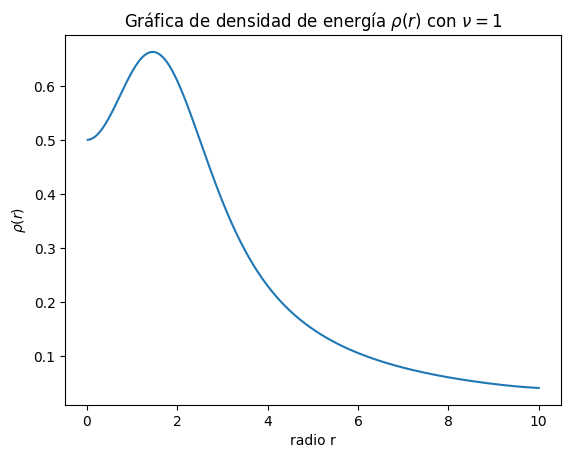

In [4]:
#densidad de energía con n=2
rho=(r**2*ds+2*r*s)**2+(l/2)*((r**2*s)**2-nu**2)**2+(4/r**2)*(r**2*s)**2    #rho(r)=f'**2+(l/2)*(f**2-nu**2)+(4/r**2)*f**2
plt.plot(r,rho)
plt.xlabel('radio r')
plt.ylabel(r'$\rho(r)$')
plt.title(r'Gráfica de densidad de energía $\rho(r)$ con $\nu=1$')
plt.show()

Cálculo numérico de la energía en base a la densidad de energía con n=2

In [6]:
E=np.trapz(rho,r)
if np.isnan(E):
  print('La energía con la configuración n=2 es E=inf')
else:
  print('La energía con la configuración n=2 es E=',E)

La energía con la configuración n=2 es E=inf
